In [125]:
import keras
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D,MaxPooling2D,LeakyReLU
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [102]:
path = 'gestures'
X = []
Y = []
for folder in os.listdir(path):
    folder_path = '{}/{}'.format(path,folder)
    print(folder_path)
    for f in os.listdir(folder_path):
        img_path = "{}/{}".format(folder_path,f)
        img = cv2.imread(img_path)
        flip = np.fliplr(img)
        X.append(img)
        Y.append(folder)
        
        X.append(flip)
        Y.append(folder)
        
X = np.array(X,np.float32)/255.
Y = np.array(Y)

gestures/0
gestures/1
gestures/2
gestures/3
gestures/4
gestures/5
gestures/6
gestures/7
gestures/8
gestures/9


In [103]:
X.shape,Y.shape

((24000, 200, 200, 3), (24000,))

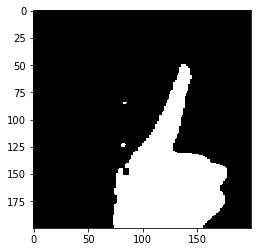

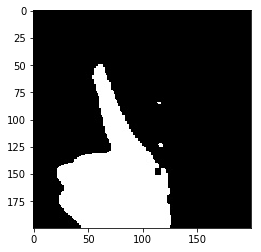

In [104]:
plt.imshow(X[3000])
plt.show()

plt.imshow(X[3001])
plt.show()

In [105]:
encoded = to_categorical(Y)
encoded.shape

(24000, 10)

TypeError: only length-1 arrays can be converted to Python scalars

In [106]:
X_train,X_test,Y_train,Y_test = train_test_split(X,encoded,test_size = 0.25,random_state=1)

In [107]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((18000, 200, 200, 3), (6000, 200, 200, 3), (18000, 10), (6000, 10))

In [121]:
#model

model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=(200,200,3),activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',input_shape=(200,200,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=None, padding='valid'))

model.add(Conv2D(128,(3,3),padding='same',input_shape=(200,200,3),activation='relu'))
model.add(Conv2D(128,(3,3),padding='same',input_shape=(200,200,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=None, padding='valid'))

model.add(Conv2D(128,(3,3),padding='same',input_shape=(200,200,3),activation='relu'))
model.add(Conv2D(128,(3,3),padding='same',input_shape=(200,200,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=None, padding='valid'))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation=tf.nn.softmax))




In [122]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [123]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 200, 200, 64)      36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 66, 66, 128)       73856     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 66, 66, 128)       147584    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 22, 22, 128)       147584    
__________

In [126]:
checkpoint = ModelCheckpoint("vgg19.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5,callbacks=[checkpoint])

Train on 18000 samples, validate on 6000 samples
Epoch 1/5


 6176/18000 [=========>....................] - ETA: 1:30:11 - loss: 1.5943 - acc: 0.46 - ETA: 1:29:50 - loss: 1.4632 - acc: 0.45 - ETA: 1:29:10 - loss: 1.2955 - acc: 0.52 - ETA: 1:29:36 - loss: 1.2515 - acc: 0.57 - ETA: 1:30:48 - loss: 1.2385 - acc: 0.58 - ETA: 1:31:27 - loss: 1.2893 - acc: 0.57 - ETA: 1:31:22 - loss: 1.2740 - acc: 0.58 - ETA: 1:32:41 - loss: 1.2542 - acc: 0.59 - ETA: 1:33:12 - loss: 1.2321 - acc: 0.60 - ETA: 1:32:54 - loss: 1.2101 - acc: 0.61 - ETA: 1:32:23 - loss: 1.2241 - acc: 0.61 - ETA: 1:31:53 - loss: 1.1922 - acc: 0.62 - ETA: 1:31:25 - loss: 1.1606 - acc: 0.63 - ETA: 1:31:03 - loss: 1.1598 - acc: 0.63 - ETA: 1:30:44 - loss: 1.1206 - acc: 0.64 - ETA: 1:30:26 - loss: 1.0970 - acc: 0.65 - ETA: 1:30:08 - loss: 1.0833 - acc: 0.65 - ETA: 1:29:48 - loss: 1.0799 - acc: 0.65 - ETA: 1:30:06 - loss: 1.1014 - acc: 0.65 - ETA: 1:29:52 - loss: 1.0923 - acc: 0.66 - ETA: 1:29:39 - loss: 1.0739 - acc: 0.66 - ETA: 1:29:24 - loss: 1.0668 - acc: 0.67 - ETA: 1:29:05 - loss: 1.0463 -

 6240/18000 [=========>....................] - ETA: 1:26:34 - loss: 0.0390 - acc: 1.00 - ETA: 1:27:10 - loss: 0.0303 - acc: 1.00 - ETA: 1:27:09 - loss: 0.0236 - acc: 1.00 - ETA: 1:26:53 - loss: 0.0684 - acc: 0.98 - ETA: 1:26:43 - loss: 0.0735 - acc: 0.98 - ETA: 1:26:54 - loss: 0.0643 - acc: 0.98 - ETA: 1:26:32 - loss: 0.0574 - acc: 0.98 - ETA: 1:26:21 - loss: 0.0504 - acc: 0.98 - ETA: 1:26:15 - loss: 0.0461 - acc: 0.98 - ETA: 1:26:12 - loss: 0.0555 - acc: 0.98 - ETA: 1:26:19 - loss: 0.0535 - acc: 0.98 - ETA: 1:26:43 - loss: 0.0503 - acc: 0.98 - ETA: 1:26:42 - loss: 0.0627 - acc: 0.98 - ETA: 1:26:34 - loss: 0.0582 - acc: 0.98 - ETA: 1:26:28 - loss: 0.0545 - acc: 0.98 - ETA: 1:26:17 - loss: 0.0513 - acc: 0.98 - ETA: 1:26:06 - loss: 0.0578 - acc: 0.97 - ETA: 1:25:55 - loss: 0.0615 - acc: 0.97 - ETA: 1:25:44 - loss: 0.0596 - acc: 0.98 - ETA: 1:25:33 - loss: 0.0600 - acc: 0.97 - ETA: 1:25:26 - loss: 0.0633 - acc: 0.97 - ETA: 1:25:18 - loss: 0.0660 - acc: 0.97 - ETA: 1:25:07 - loss: 0.0636 -

18000/18000 [==============================] - ETA: 25:38 - loss: 0.0293 - acc: 0.99 - ETA: 25:29 - loss: 0.0292 - acc: 0.99 - ETA: 25:19 - loss: 0.0292 - acc: 0.99 - ETA: 25:10 - loss: 0.0291 - acc: 0.99 - ETA: 25:01 - loss: 0.0294 - acc: 0.99 - ETA: 24:51 - loss: 0.0293 - acc: 0.99 - ETA: 24:42 - loss: 0.0294 - acc: 0.99 - ETA: 24:32 - loss: 0.0295 - acc: 0.99 - ETA: 24:23 - loss: 0.0294 - acc: 0.99 - ETA: 24:13 - loss: 0.0294 - acc: 0.99 - ETA: 24:04 - loss: 0.0294 - acc: 0.99 - ETA: 23:54 - loss: 0.0300 - acc: 0.99 - ETA: 23:45 - loss: 0.0299 - acc: 0.99 - ETA: 23:35 - loss: 0.0299 - acc: 0.99 - ETA: 23:26 - loss: 0.0298 - acc: 0.99 - ETA: 23:16 - loss: 0.0298 - acc: 0.99 - ETA: 23:07 - loss: 0.0299 - acc: 0.99 - ETA: 22:57 - loss: 0.0298 - acc: 0.99 - ETA: 22:48 - loss: 0.0298 - acc: 0.99 - ETA: 22:38 - loss: 0.0298 - acc: 0.99 - ETA: 22:29 - loss: 0.0297 - acc: 0.99 - ETA: 22:19 - loss: 0.0298 - acc: 0.99 - ETA: 22:10 - loss: 0.0298 - acc: 0.99 - ETA: 22:00 - loss: 0.0297 - acc: 

 6240/18000 [=========>....................] - ETA: 1:29:23 - loss: 0.0075 - acc: 1.00 - ETA: 1:29:30 - loss: 0.0080 - acc: 1.00 - ETA: 1:29:11 - loss: 0.0056 - acc: 1.00 - ETA: 1:28:47 - loss: 0.0043 - acc: 1.00 - ETA: 1:28:46 - loss: 0.0035 - acc: 1.00 - ETA: 1:28:42 - loss: 0.0047 - acc: 1.00 - ETA: 1:28:36 - loss: 0.0086 - acc: 0.99 - ETA: 1:28:41 - loss: 0.0080 - acc: 0.99 - ETA: 1:28:52 - loss: 0.0071 - acc: 0.99 - ETA: 1:28:40 - loss: 0.0064 - acc: 0.99 - ETA: 1:28:27 - loss: 0.0059 - acc: 0.99 - ETA: 1:28:10 - loss: 0.0054 - acc: 0.99 - ETA: 1:28:00 - loss: 0.0060 - acc: 0.99 - ETA: 1:27:48 - loss: 0.0093 - acc: 0.99 - ETA: 1:27:33 - loss: 0.0104 - acc: 0.99 - ETA: 1:27:31 - loss: 0.0121 - acc: 0.99 - ETA: 1:27:25 - loss: 0.0114 - acc: 0.99 - ETA: 1:27:16 - loss: 0.0109 - acc: 0.99 - ETA: 1:27:04 - loss: 0.0103 - acc: 0.99 - ETA: 1:26:54 - loss: 0.0098 - acc: 0.99 - ETA: 1:26:43 - loss: 0.0093 - acc: 0.99 - ETA: 1:26:36 - loss: 0.0090 - acc: 0.99 - ETA: 1:26:26 - loss: 0.0086 -

 6240/18000 [=========>....................] - ETA: 1:28:33 - loss: 9.6762e-05 - acc: 1.00 - ETA: 1:28:47 - loss: 0.0075 - acc: 1.0000   - ETA: 1:27:55 - loss: 0.0050 - acc: 1.00 - ETA: 1:27:28 - loss: 0.0040 - acc: 1.00 - ETA: 1:27:25 - loss: 0.0055 - acc: 1.00 - ETA: 1:27:11 - loss: 0.0045 - acc: 1.00 - ETA: 1:27:08 - loss: 0.0039 - acc: 1.00 - ETA: 1:27:09 - loss: 0.0034 - acc: 1.00 - ETA: 1:26:55 - loss: 0.0031 - acc: 1.00 - ETA: 1:26:50 - loss: 0.0028 - acc: 1.00 - ETA: 1:26:39 - loss: 0.0025 - acc: 1.00 - ETA: 1:26:34 - loss: 0.0023 - acc: 1.00 - ETA: 1:26:23 - loss: 0.0021 - acc: 1.00 - ETA: 1:26:14 - loss: 0.0022 - acc: 1.00 - ETA: 1:26:05 - loss: 0.0020 - acc: 1.00 - ETA: 1:25:55 - loss: 0.0019 - acc: 1.00 - ETA: 1:25:46 - loss: 0.0020 - acc: 1.00 - ETA: 1:25:41 - loss: 0.0019 - acc: 1.00 - ETA: 1:25:28 - loss: 0.0018 - acc: 1.00 - ETA: 1:25:17 - loss: 0.0017 - acc: 1.00 - ETA: 1:25:06 - loss: 0.0019 - acc: 1.00 - ETA: 1:24:54 - loss: 0.0019 - acc: 1.00 - ETA: 1:24:42 - loss: 

18000/18000 [==============================] - ETA: 25:34 - loss: 0.0162 - acc: 0.99 - ETA: 25:24 - loss: 0.0161 - acc: 0.99 - ETA: 25:15 - loss: 0.0161 - acc: 0.99 - ETA: 25:06 - loss: 0.0161 - acc: 0.99 - ETA: 24:56 - loss: 0.0160 - acc: 0.99 - ETA: 24:47 - loss: 0.0160 - acc: 0.99 - ETA: 24:37 - loss: 0.0159 - acc: 0.99 - ETA: 24:28 - loss: 0.0163 - acc: 0.99 - ETA: 24:18 - loss: 0.0163 - acc: 0.99 - ETA: 24:09 - loss: 0.0163 - acc: 0.99 - ETA: 23:59 - loss: 0.0162 - acc: 0.99 - ETA: 23:50 - loss: 0.0162 - acc: 0.99 - ETA: 23:40 - loss: 0.0161 - acc: 0.99 - ETA: 23:31 - loss: 0.0161 - acc: 0.99 - ETA: 23:22 - loss: 0.0161 - acc: 0.99 - ETA: 23:12 - loss: 0.0164 - acc: 0.99 - ETA: 23:03 - loss: 0.0163 - acc: 0.99 - ETA: 22:53 - loss: 0.0173 - acc: 0.99 - ETA: 22:44 - loss: 0.0176 - acc: 0.99 - ETA: 22:34 - loss: 0.0176 - acc: 0.99 - ETA: 22:25 - loss: 0.0176 - acc: 0.99 - ETA: 22:15 - loss: 0.0176 - acc: 0.99 - ETA: 22:06 - loss: 0.0176 - acc: 0.99 - ETA: 21:57 - loss: 0.0177 - acc: 

 6240/18000 [=========>....................] - ETA: 1:27:52 - loss: 9.6511e-05 - acc: 1.00 - ETA: 1:28:44 - loss: 0.0010 - acc: 1.0000   - ETA: 1:28:22 - loss: 9.2415e-04 - acc: 1.00 - ETA: 1:28:26 - loss: 0.0015 - acc: 1.0000   - ETA: 1:28:17 - loss: 0.0030 - acc: 1.00 - ETA: 1:27:49 - loss: 0.0028 - acc: 1.00 - ETA: 1:27:45 - loss: 0.0099 - acc: 0.99 - ETA: 1:27:32 - loss: 0.0104 - acc: 0.99 - ETA: 1:27:18 - loss: 0.0093 - acc: 0.99 - ETA: 1:27:12 - loss: 0.0084 - acc: 0.99 - ETA: 1:26:56 - loss: 0.0079 - acc: 0.99 - ETA: 1:26:41 - loss: 0.0073 - acc: 0.99 - ETA: 1:26:35 - loss: 0.0145 - acc: 0.99 - ETA: 1:26:23 - loss: 0.0134 - acc: 0.99 - ETA: 1:26:17 - loss: 0.0133 - acc: 0.99 - ETA: 1:26:10 - loss: 0.0125 - acc: 0.99 - ETA: 1:25:59 - loss: 0.0119 - acc: 0.99 - ETA: 1:25:48 - loss: 0.0306 - acc: 0.99 - ETA: 1:25:40 - loss: 0.0291 - acc: 0.99 - ETA: 1:25:34 - loss: 0.0277 - acc: 0.99 - ETA: 1:25:28 - loss: 0.0269 - acc: 0.99 - ETA: 1:25:18 - loss: 0.0260 - acc: 0.99 - ETA: 1:25:06 

In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [2]:
weights = load_model('model.h5')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
